In [172]:
import pandas as pd
import glob

df = pd.concat(map(pd.read_csv, glob.glob("data/*.txt")))
df

# deal with RECOVR/AUD

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009
...,...,...,...,...,...,...,...,...,...,...,...
208046,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/04/2020,05:00:00,REGULAR,5554,541
208047,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/04/2020,09:00:00,REGULAR,5554,541
208048,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/04/2020,13:00:00,REGULAR,5554,541
208049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/04/2020,17:00:00,REGULAR,5554,541


In [135]:
df["DATE_TIME"] = pd.to_datetime(df["DATE"] + " " + df["TIME"], format="%m/%d/%Y %H:%M:%S")

In [180]:
daily_entries = df.groupby(["C/A", "UNIT", "STATION", "SCP", "DATE"])["ENTRIES"].agg(lambda x: max(x)-min(x))
#daily_entries[daily_entries > 1000000]

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

daily_entries.index
daily_entries_single = daily_entries["A002"]["R051"]["59 ST"]["02-00-01"]
daily_entries_single
daily_entries_single.index.tolist()

['08/29/2020',
 '08/30/2020',
 '08/31/2020',
 '09/01/2020',
 '09/02/2020',
 '09/03/2020',
 '09/04/2020',
 '09/05/2020',
 '09/06/2020',
 '09/07/2020',
 '09/08/2020',
 '09/09/2020',
 '09/10/2020',
 '09/11/2020',
 '09/12/2020',
 '09/13/2020',
 '09/14/2020',
 '09/15/2020',
 '09/16/2020',
 '09/17/2020',
 '09/18/2020']

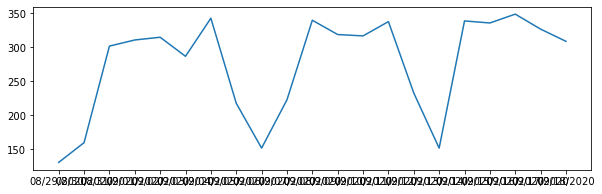

In [182]:
dates = daily_entries_single.index.tolist()
entries = daily_entries_single[dates]
plt.figure(figsize=(10,3))
plt.plot(dates,entries)

In [205]:
daily_entries.groupby(["C/A", "UNIT", "STATION"]).sum()

C/A    UNIT  STATION      
A002   R051  59 ST            7491756
A006   R079  5 AV/59 ST         48861
A007   R079  5 AV/59 ST         16519
A010   R080  57 ST-7 AV         66108
A011   R080  57 ST-7 AV         29017
                               ...   
S101   R070  ST. GEORGE         22204
S101A  R070  ST. GEORGE         23326
S102   R165  TOMPKINSVILLE       4511
TRAM1  R468  RIT-MANHATTAN      28778
TRAM2  R469  RIT-ROOSEVELT      28661
Name: ENTRIES, Length: 750, dtype: int64

In [196]:
daily_entries_2 = df.groupby(["C/A", "UNIT", "STATION"])
daily_entries_2.head(30)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009
...,...,...,...,...,...,...,...,...,...,...,...
209434,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,09/16/2020,05:00:00,REGULAR,653283,14253
209435,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,09/16/2020,09:00:00,REGULAR,653440,14256
209436,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,09/16/2020,13:00:00,REGULAR,653588,14260
209437,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,09/16/2020,17:00:00,REGULAR,653744,14267


In [191]:
daily_entries_3 = daily_entries.groupby(["C/A", "UNIT", "STATION", "DATE"])
daily_entries_3.head(30)

C/A    UNIT  STATION        SCP       DATE      
A002   R051  59 ST          02-00-00  08/29/2020    235
                                      08/30/2020    184
                                      08/31/2020    484
                                      09/01/2020    393
                                      09/02/2020    460
                                                   ... 
TRAM2  R469  RIT-ROOSEVELT  00-05-01  09/14/2020      0
                                      09/15/2020      0
                                      09/16/2020      0
                                      09/17/2020      0
                                      09/18/2020      0
Name: ENTRIES, Length: 103370, dtype: int64